In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [40]:
# load the csv file
df=pd.read_csv(r"D:\Iqbal.csv")
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [4]:
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [41]:
df = df.drop((["Country name","Regional indicator", "Explained by: Healthy life expectancy",
    "Explained by: Social support",
    "Explained by: Log GDP per capita",
    "Explained by: Freedom to make life choices",
    "Explained by: Generosity",
    "Explained by: Perceptions of corruption",
    "Dystopia + residual",
    "Ladder score in Dystopia", "upperwhisker",
       "lowerwhisker" ]), axis=1)


In [12]:
df.columns

Index(['Ladder score', 'Standard error of ladder score', 'upperwhisker',
       'lowerwhisker', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [13]:
df.isnull().sum()

Ladder score                      0
Standard error of ladder score    0
upperwhisker                      0
lowerwhisker                      0
Logged GDP per capita             0
Social support                    0
Healthy life expectancy           0
Freedom to make life choices      0
Generosity                        0
Perceptions of corruption         0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [18]:
df.nunique()

Ladder score                      147
Standard error of ladder score     65
upperwhisker                      146
lowerwhisker                      143
Logged GDP per capita             148
Social support                    119
Healthy life expectancy           135
Freedom to make life choices      126
Generosity                        130
Perceptions of corruption         130
dtype: int64

In [42]:
df.describe()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,0.022001,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,0.026000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,0.043000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,0.054000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,0.070000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,0.173000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


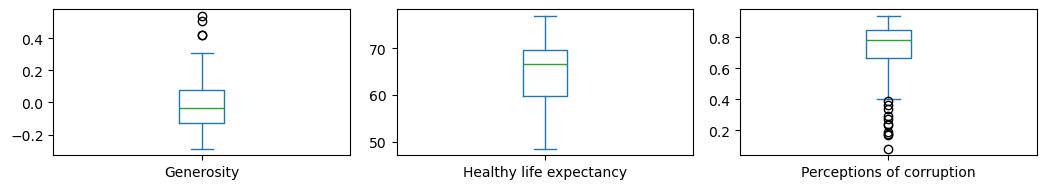

In [43]:
# Checking for outliers using Boxplot
df[["Generosity", "Healthy life expectancy", "Perceptions of corruption"]].plot( kind='box', figsize=(14, 2),
    subplots=True, layout=(1, 4))

plt.tight_layout()
plt.show()

In [44]:
from scipy.stats.mstats import winsorize

cols = ["Generosity", "Healthy life expectancy", "Perceptions of corruption"]

for c in cols:
    df[c] = winsorize(df[c], limits=[0.01, 0.01])


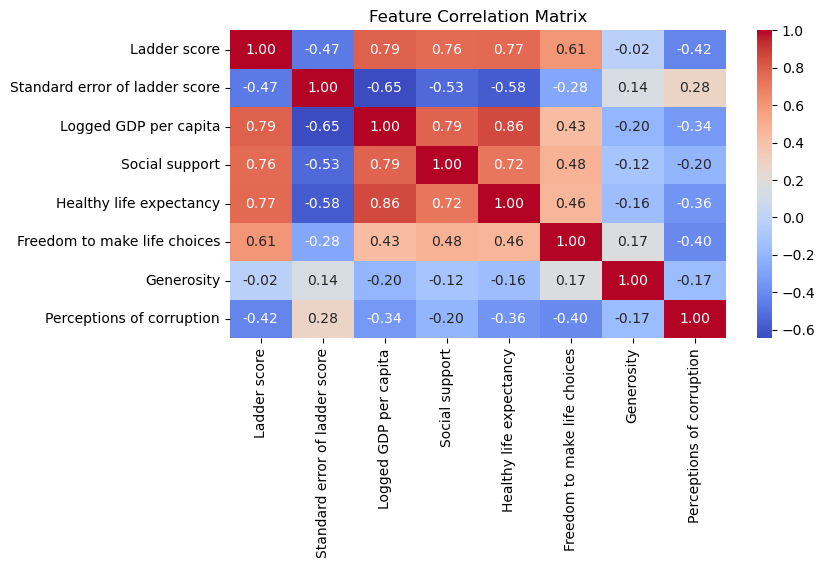

In [45]:
# Checking corrlation btw variables using Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [23]:
df.columns

Index(['Ladder score', 'Standard error of ladder score', 'upperwhisker',
       'lowerwhisker', 'Logged GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [46]:
# Linear regression model building
x = df[['Ladder score', 'Standard error of ladder score', 'Logged GDP per capita', 
        'Social support', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = df['Healthy life expectancy']

x = sm.add_constant(x)

x_train,x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.2)

SLR_Model = sm.OLS(y_train, x_train).fit()
print(SLR_Model.summary())

                               OLS Regression Results                              
Dep. Variable:     Healthy life expectancy   R-squared:                       0.770
Model:                                 OLS   Adj. R-squared:                  0.755
Method:                      Least Squares   F-statistic:                     52.99
Date:                     Mon, 24 Nov 2025   Prob (F-statistic):           1.60e-32
Time:                             20:50:58   Log-Likelihood:                -309.60
No. Observations:                      119   AIC:                             635.2
Df Residuals:                          111   BIC:                             657.4
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

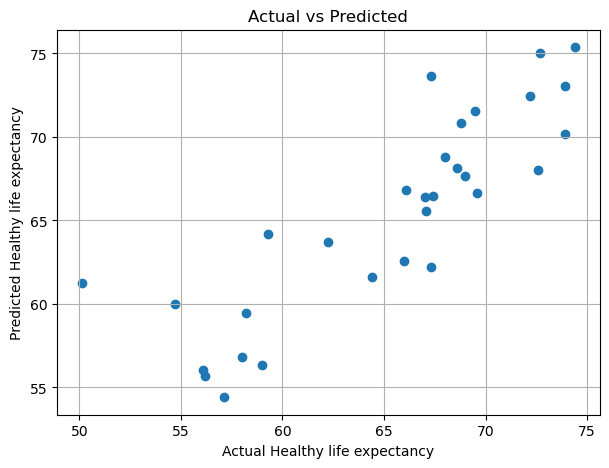

In [53]:
import matplotlib.pyplot as plt

# Predict using your trained model
y_pred = SLR_Model.predict(x_test)

# Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Healthy life expectancy")
plt.ylabel("Predicted Healthy life expectancy")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()



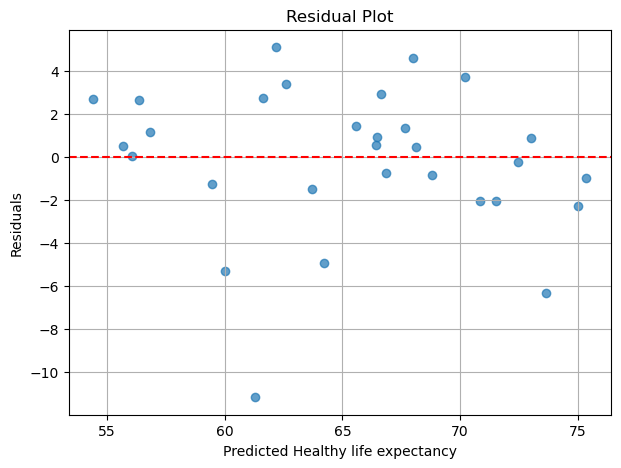

In [54]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Healthy life expectancy")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()
